**First we will set the width of the notebook as it is a large dataframe, and import the regular libraries.**

In [1]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
""")) 

In [2]:
# setting theme
#!jt -r
!jt -t chesterish

In [2]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 500)
sns.set_style(style='darkgrid') 

In [3]:
import warnings
warnings.filterwarnings("ignore") 

## Data preparation for Application Dataset

**First we will import the Application Data into a dataframe, and prepare it for analysis. We will drop any columns which have more than 13.5% missing values.**

In [5]:
app_df = pd.read_csv("application_data.csv")
app_df.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**We will first check the basic information about this dataframe, e.g. shape, info etc.**

In [6]:
app_df.shape

(307511, 122)

In [7]:
app_df.info(null_counts = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [8]:
app_df.dtypes.value_counts() 

float64    65
int64      41
object     16
dtype: int64

**We will now check for the percentage of missing values in each column of this dataframe.**

In [9]:
round(100*(app_df.isnull().sum()/len(app_df.index)), 2) 

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**We will now define a function which will drop the columns with more than** <span style="color:'#3acd2f">**13.5%**</span> **missing values.**

In [9]:
def get_top_nulls(df, percentage):
    import io
    pd.set_option('display.max_info_columns', 500)
    pd.set_option('display.max_info_rows', 500)    
    buf = io.StringIO()
    df.info(buf=buf, null_counts=True)
    info_str = buf.getvalue().split('\n')[3:][:-3]
    info_df=pd.DataFrame([s.split()[:2] for s in info_str])
    info_df.columns = ['Field', 'NonNulls']
    info_df.NonNulls = pd.to_numeric(info_df.NonNulls)
    
    drop_cols = list (info_df.loc[info_df.NonNulls < (len(df)*(1-percentage)) , 'Field' ])
    return drop_cols

**We can see below that this operation will remove** <span style="color:'#ff4545">**51**</span> **columns from the dataframe.**

In [11]:
len(get_top_nulls(app_df, 0.136)) 

51

**We will now pass the dataframe through our function to create a new dataframe, with not more than** <span style="color:#ff8226">**13.5%**</span> **missing values in any columns.**

In [12]:
drop_cols = get_top_nulls(app_df, 0.136)
app_df_drop = app_df.drop(columns = drop_cols)
app_df_drop.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
app_df_drop.shape 

(307511, 71)

In [14]:
app_df_drop.dtypes.value_counts() 

int64      41
float64    19
object     11
dtype: int64

**Let's inspect the missing value percentages of this new dataframe.**

In [15]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

**Let's analyse the columns with missing values. We will start with 'AMT_REQ_CREDIT_BUREAU_HOUR', and inspect this column.**

In [16]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].describe() 

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

**Looks like it is column of integers, incorrectly set as floats. Let's analyse it using value counts.**

In [17]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts() 

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

**As 'AMT_REQ_CREDIT_BUREAU_HOUR' is a integer variable, we can't use** <span style="color:'#ff4545">**mean or median**</span> **to impute this. So we will impute by** <span style="color:'#3acd2f">**mode**</span>**, as it covers** <span style="color:#ff8226">**99.40**</span> **of all the available values, and** <span style="color:#ff8226">**85.97**</span> **of all values. Therefore we are imputing NaNs by 0.** 

In [18]:
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_HOUR']), ['AMT_REQ_CREDIT_BUREAU_HOUR']] = 0
app_df_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts() 

0.0    305885
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

**Let's inspect the dataframe once again.**

In [19]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

**We will now inspect the next 5 variables, and see how we can impute their values**

In [20]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts() 

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [21]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts() 

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [22]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_MON'].value_counts() 

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [23]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts() 

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [24]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts() 

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

**After the inspection, we can see that except the year, the other 4 variables can be safely imputed by 0.**

In [25]:
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_DAY']), ['AMT_REQ_CREDIT_BUREAU_DAY']] = 0
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_WEEK']), ['AMT_REQ_CREDIT_BUREAU_WEEK']] = 0
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_MON']), ['AMT_REQ_CREDIT_BUREAU_MON']] = 0
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0 

In [26]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

**Let's see if we can do something about the 'AMT_REQ_CREDIT_BUREAU_YEAR' column**

In [27]:
app_df_drop['AMT_REQ_CREDIT_BUREAU_YEAR'].describe() 

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

**Looks like we can use the** <span style="color:#3acd2f">**median**</span> **for imputing this one.**

In [28]:
app_df_drop.loc[pd.isnull(app_df_drop['AMT_REQ_CREDIT_BUREAU_YEAR']), ['AMT_REQ_CREDIT_BUREAU_YEAR']] = 1

In [30]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

**Let's find out which columns still have missing values.**

In [31]:
app_df_drop.columns[app_df_drop.isnull().any()] 

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

**Since we have only imputed numerical variables so far, we will now impute a categorical variable.**

In [32]:
app_df_drop['NAME_TYPE_SUITE'].value_counts() 

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**We can impute this one with** <span style="color:#3acd2f">**mode**</span>**, as the frequency of maximum occurence is much higher than the rest of the options.**

In [33]:
app_df_drop.loc[pd.isnull(app_df_drop['NAME_TYPE_SUITE']), ['NAME_TYPE_SUITE']] = 'Unaccompanied'

In [34]:
app_df_drop['NAME_TYPE_SUITE'].value_counts() 

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [35]:
round(100*(app_df_drop.isnull().sum()/len(app_df_drop.index)), 2) 

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

**We have imputed more than 5 variables with the best metric, and these comprise of both categorical and numerical variables.**
**We willl now check the data types of the remaining columns**

In [36]:
app_df_drop.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

**We can clearly see that the following columns need to be changed into integer data type from float:**
<pre>
CNT_FAM_MEMBERS
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
</pre>

**To avoid running into errors, we will use the fillna option to fill these values with 0.**

In [37]:
app_df_drop = app_df_drop.fillna(0) 

In [38]:
app_df_drop[['CNT_FAM_MEMBERS', 
            'AMT_REQ_CREDIT_BUREAU_HOUR', 
            'AMT_REQ_CREDIT_BUREAU_DAY', 
            'AMT_REQ_CREDIT_BUREAU_WEEK', 
            'AMT_REQ_CREDIT_BUREAU_MON', 
            'AMT_REQ_CREDIT_BUREAU_QRT', 
            'AMT_REQ_CREDIT_BUREAU_YEAR']] = app_df_drop[['CNT_FAM_MEMBERS',
                                                          'AMT_REQ_CREDIT_BUREAU_HOUR',
                                                          'AMT_REQ_CREDIT_BUREAU_DAY',
                                                          'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                          'AMT_REQ_CREDIT_BUREAU_MON',
                                                          'AMT_REQ_CREDIT_BUREAU_QRT',
                                                          'AMT_REQ_CREDIT_BUREAU_YEAR']].astype('int64') 

**Let's check the data types once again:**

In [39]:
app_df_drop.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

**And we will check the value counts as well.**

In [40]:
app_df_drop.dtypes.value_counts() 

int64      48
float64    12
object     11
dtype: int64

**We will now check for outliers and treat them for** <span style="color:#ff8226">**3 numerical variables.**</span>

In [41]:
app_df_drop['AMT_INCOME_TOTAL'].describe([.05,.1,.25,.75,.85,.9,.95,1]) 

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
5%       6.750000e+04
10%      8.100000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
85%      2.340000e+05
90%      2.700000e+05
95%      3.375000e+05
100%     1.170000e+08
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [42]:
app_df_drop['AMT_CREDIT'].describe([.05,.1,.25,.75,.85,.9,.95,1]) 

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
5%       1.350000e+05
10%      1.800000e+05
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
85%      1.024740e+06
90%      1.133748e+06
95%      1.350000e+06
100%     4.050000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [43]:
app_df_drop['AMT_ANNUITY'].describe([.05,.1,.25,.75,.85,.9,.95,1]) 

count    307511.000000
mean      27107.516051
std       14494.443757
min           0.000000
5%         9000.000000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
85%       40806.000000
90%       45954.000000
95%       53325.000000
100%     258025.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

**We can clearly see that if we exclude values beyond the** <span style="color:#ff8226">**95th percentile**</span>**, we can remove the outliers for these columns.**  
**Let's go ahead and do that.**

In [44]:
lo = .00 #.05
hi = .95
app_df_quant = app_df_drop.quantile([lo, hi]) 
app_df_quant[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']] = app_df_drop[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].quantile([lo, hi]) 
app_df_drop[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']] = app_df_drop[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].apply(lambda x: x[(x > app_df_quant.loc[lo,x.name]) & (x <= app_df_quant.loc[hi,x.name])], axis=0) 
app_df_drop.describe() 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,293474.000000,2.932470e+05,292159.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,154264.812449,5.467967e+05,25104.804497,5.379095e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152651,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.513289,1.417523,0.142944,1.400626,0.099717,-962.855657,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,64014.287380,3.239815e+05,11301.204541,3.696338e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910695,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.192334,2.398395,0.446033,2.377224,0.361735,826.808966,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,26100.000000,4.797000e+04,1615.500000,0.000000e+00,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,112500.000000,2.700000e+05,16155.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0

**Let's inspect our newly filtered columns.**

In [45]:
print(app_df_drop['AMT_INCOME_TOTAL'].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1])) 
print(app_df_drop['AMT_CREDIT'].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1])) 
print(app_df_drop['AMT_ANNUITY'].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1])) 

count    293474.000000
mean     154264.812449
std       64014.287380
min       26100.000000
10%       81000.000000
20%       94500.000000
30%      112500.000000
40%      135000.000000
50%      135000.000000
60%      157500.000000
70%      180000.000000
80%      202500.000000
90%      247500.000000
95%      270000.000000
100%     337500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64
count    2.932470e+05
mean     5.467967e+05
std      3.239815e+05
min      4.797000e+04
10%      1.800000e+05
20%      2.476755e+05
30%      2.925000e+05
40%      4.029390e+05
50%      4.950000e+05
60%      5.707395e+05
70%      6.795000e+05
80%      8.307090e+05
90%      1.046142e+06
95%      1.185120e+06
100%     1.350000e+06
max      1.350000e+06
Name: AMT_CREDIT, dtype: float64
count    292159.000000
mean      25104.804497
std       11301.204541
min        1615.500000
10%       10826.100000
20%       14350.500000
30%       17689.500000
40%       21190.500000
50%       24102.000000
6

**We can see that the outliers are gone. Let's bin two continuous variables. We will defnie a function to do this.**

In [28]:
def bin_amounts(amt):
    amt_bins = {'5K' : (0, 5000), '50K': (5001, 50000), '200K' : (50000, 200000), '500K' : (200001, 500000), \
           '1M'  : (500001, 1000000), '5M' : (1000001, 5000000), '10M' : (5000001, 10000000), \
           '50M' : (10000001, 50000000), '100M' : (50000001, 100000000), '100M+' : (100000000, None)}
    for (bin_cat, bin_range) in amt_bins.items():
        if bin_range[1] == None:
            return bin_cat
        elif amt >= bin_range[0] and amt <= bin_range[1]:
            return bin_cat
    return 'NO Bin'
            

**We will now bin the following two variables: 'AMT_CREDIT_BIN' and 'AMT_TOTAL_INCOME'**

In [47]:
app_df_drop['AMT_CREDIT_BIN'] = app_df_drop.AMT_CREDIT.apply(bin_amounts) 
app_df_drop['AMT_INCOME_TOTAL_BIN'] = app_df_drop.AMT_INCOME_TOTAL.apply(bin_amounts) 

**Let's examine the binned variables and see what kind of results we got.**

In [48]:
app_df_drop['AMT_CREDIT_BIN'].value_counts() 

500K     113189
1M       108193
5M        35951
200K      35583
100M+     14264
50K         331
Name: AMT_CREDIT_BIN, dtype: int64

In [49]:
app_df_drop['AMT_INCOME_TOTAL_BIN'].value_counts() 

200K     215079
500K      73880
100M+     14037
50K        4515
Name: AMT_INCOME_TOTAL_BIN, dtype: int64

**We will bin two other variables for use in Numerical Univariate Analysis later.**

In [50]:
app_df_drop['AMT_ANNUITY_BIN'] = app_df_drop.AMT_ANNUITY.apply(bin_amounts) 
app_df_drop['AMT_GOODS_PRICE_BIN'] = app_df_drop.AMT_GOODS_PRICE.apply(bin_amounts) 

**Let's examine the data imbalance in this dataset.**

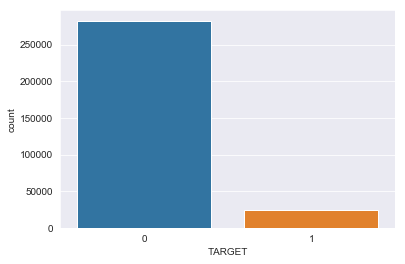

In [51]:
plt.figure(figsize=(6, 4))
sns.countplot(x="TARGET", data = app_df_drop)
plt.show() 

**We will now split the dataframe into two dataframes using the TARGET variable.**

In [52]:
app_df1 = app_df_drop[app_df_drop.TARGET == 1] 
app_df1.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_BIN,AMT_INCOME_TOTAL_BIN,AMT_ANNUITY_BIN,AMT_GOODS_PRICE_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,500K,500K,50K,500K
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,1M,200K,50K,1M
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4,5M,500K,50K,1M
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,500K,200K,50K,500K
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,2,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,500K,200K,50K,500K


In [53]:
app_df0 = app_df_drop[app_df_drop.TARGET == 0] 
app_df0.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_BIN,AMT_INCOME_TOTAL_BIN,AMT_ANNUITY_BIN,AMT_GOODS_PRICE_BIN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5M,500K,50K,5M
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200K,200K,50K,200K
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,500K,200K,50K,500K
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1M,200K,50K,1M
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,500K,200K,50K,500K


In [54]:
print(app_df0.shape[0]/app_df1.shape[0]) 

11.387150050352467


**So, data imbalance for the two Dataframes is a factor of** <span style="color:#ff8226">**11.38**</span>**, i.e we have more than 11 times non-defaulters as compared to defaulters.**

## Univariate analysis for the categorical variables in Application Dataset

**We will now analyse the** <span style="color:#ff8226">**categorical variables**</span> **to find if there's any correlation between the variables and the probability of someone being a defaulter.**

**We need to define custom colors to co ordiante with the legends, a problem we ran into after plotting.**

In [55]:
colors = ['#ff4545', '#ffa145', '#ffeb45', '#7aff45', '#45ffeb', '#4571ff', '#b745ff', '#ff45da', '#b8b8b8', '#505050'] 

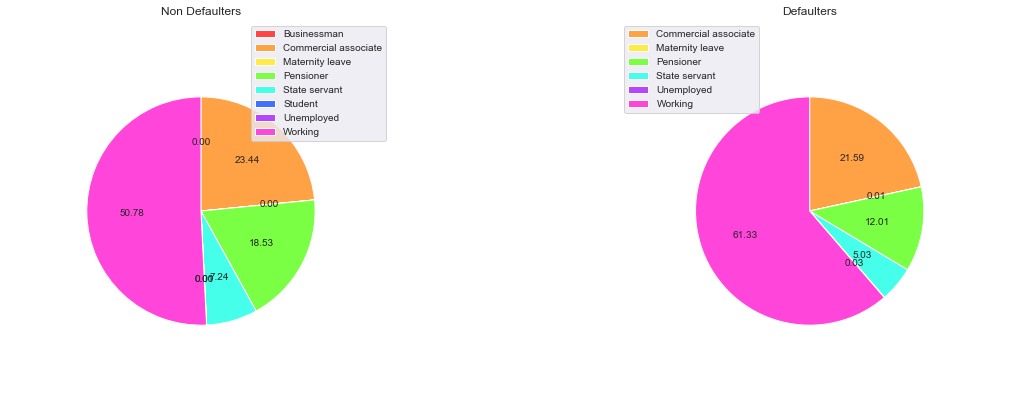

In [56]:
cat_variable = 'NAME_INCOME_TYPE'
types=sorted(list(app_df_drop[cat_variable].unique()))
color_codes=dict(zip(types, colors))

plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Count')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))    
plt.subplot(1, 2, 1)
grp_types = sorted(list(grp_df0[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df0['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f', colors=select_colors)
plt.title("Non Defaulters")
plt.legend(grp_types)


plt.subplot(1, 2, 2)
grp_df1 = (app_df1.groupby(cat_variable)['TARGET']
                 .value_counts()
                 .rename('Count')
                 .mul(100)
                 .reset_index()
                 .sort_values(cat_variable))
grp_types = sorted(list(grp_df1[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df1['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f',colors=select_colors) 
plt.title("Defaulters")
plt.legend(grp_types)
plt.show()    


**We see a very interesting trend here, that someone working is more likely to default, and someone who is a pensioner is less likely to default.**

**We will now analyse the variable 'FLAG_OWN_CAR'. Let's plot a pie chart to see the distribution.**

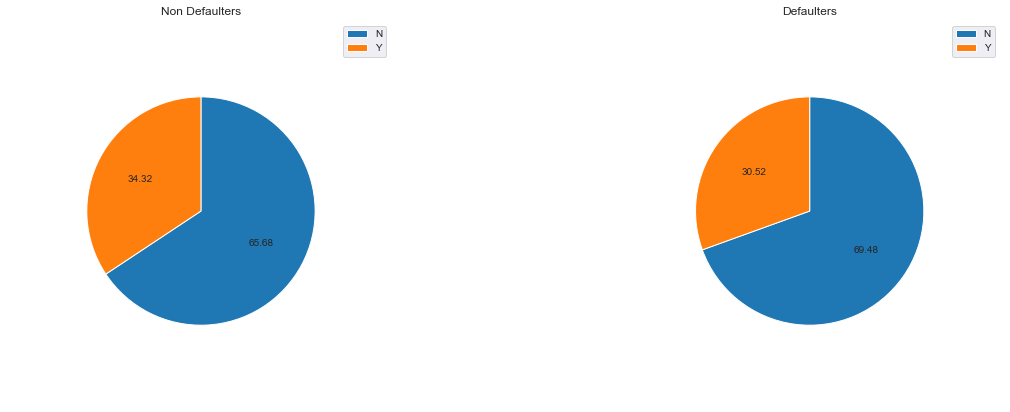

In [57]:
cat_variable = 'FLAG_OWN_CAR'
plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Percentage')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))
types = sorted(list(app_df[cat_variable].unique()))
plt.subplot(1, 2, 1)    
plt.pie(grp_df0['Percentage'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
plt.title("Non Defaulters")
plt.legend(sorted(list(grp_df0[cat_variable].unique())))


plt.subplot(1, 2, 2)
grp_df1 = (app_df1.groupby(cat_variable)['TARGET']
                 .value_counts()
                 .rename('Percentage')
                 .mul(100)
                 .reset_index()
                 .sort_values(cat_variable))
plt.pie(grp_df1['Percentage'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f') 
plt.title("Defaulters")
plt.legend(sorted(list(grp_df1[cat_variable].unique())))
plt.show()


**We see that a higher percentage of people who owns cars are Non Dafulters. However, it may simply be that people who owns cars are financially in a better condition to replay the loan, and therefore while there is a correlation, it may not indicate causation.**

**Let's take a look at the 'NAME_EDUCATION_TYPE' variable, and see if we can find anything significant there.**

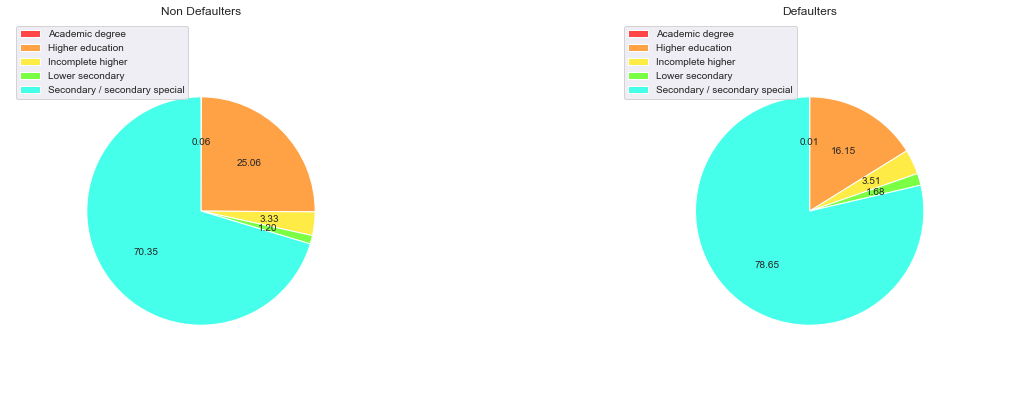

In [58]:
cat_variable = 'NAME_EDUCATION_TYPE'

types=sorted(list(app_df_drop[cat_variable].unique()))
color_codes=dict(zip(types, colors))

plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Count')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))    
plt.subplot(1, 2, 1)
grp_types = sorted(list(grp_df0[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df0['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f', colors=select_colors)
plt.title("Non Defaulters")
plt.legend(grp_types)


plt.subplot(1, 2, 2)
grp_df1 = (app_df1.groupby(cat_variable)['TARGET']
                 .value_counts()
                 .rename('Count')
                 .mul(100)
                 .reset_index()
                 .sort_values(cat_variable))
grp_types = sorted(list(grp_df1[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df1['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f',colors=select_colors) 
plt.title("Defaulters")
plt.legend(grp_types)
plt.show()    


**Here we find that people with higher education are less likely to default on a loan, which seems to be linked to higher salary, and an inclination to maintain the credit rating, which is something we assume the less educated are not too much concerned about.**

**We move on to the 'NAME_FAMILY_STATUS' and take a look at the distribution.**

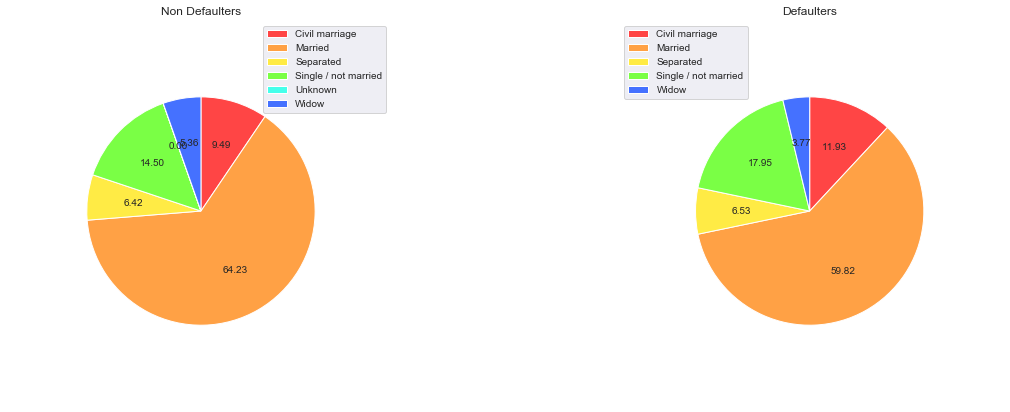

In [59]:
cat_variable = 'NAME_FAMILY_STATUS'
types=sorted(list(app_df_drop[cat_variable].unique()))
color_codes=dict(zip(types, colors))

plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Count')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))    
plt.subplot(1, 2, 1)
grp_types = sorted(list(grp_df0[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df0['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f', colors=select_colors)
plt.title("Non Defaulters")
plt.legend(grp_types)


plt.subplot(1, 2, 2)
grp_df1 = (app_df1.groupby(cat_variable)['TARGET']
                 .value_counts()
                 .rename('Count')
                 .mul(100)
                 .reset_index()
                 .sort_values(cat_variable))
grp_types = sorted(list(grp_df1[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df1['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f',colors=select_colors) 
plt.title("Defaulters")
plt.legend(grp_types)
plt.show()    


**While there's not much difference across segments, we do see a trend that married people are less likely to default on a loan, and single people are more likely.**

**We will now look into the last categorical variable we are analysing in application data, 'WEEKDAY_APPR_PROCESS_START'.**

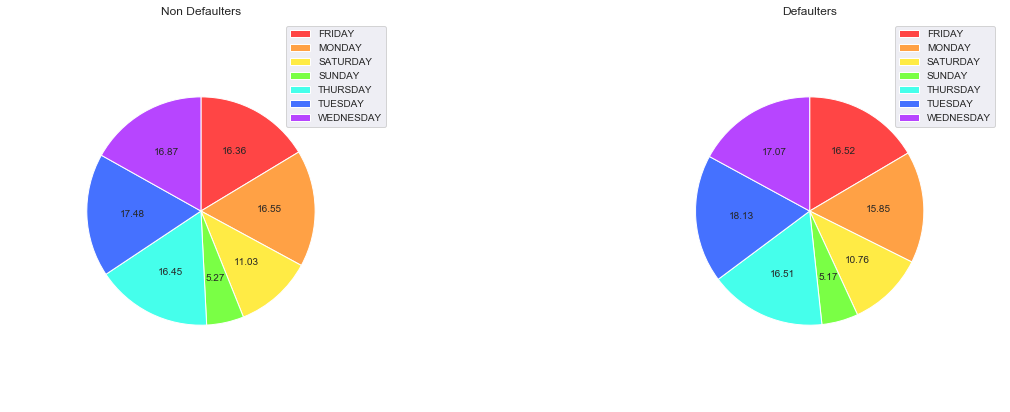

In [60]:
cat_variable = 'WEEKDAY_APPR_PROCESS_START'

types=sorted(list(app_df_drop[cat_variable].unique()))
color_codes=dict(zip(types, colors))

plt.figure(figsize=(20, 7))
grp_df0 = (app_df0.groupby([cat_variable])['TARGET']
                    .value_counts()
                    .rename('Count')
                    .mul(100)
                    .reset_index()
                    .sort_values(cat_variable))    
plt.subplot(1, 2, 1)
grp_types = sorted(list(grp_df0[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df0['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f', colors=select_colors)
plt.title("Non Defaulters")
plt.legend(grp_types)


plt.subplot(1, 2, 2)
grp_df1 = (app_df1.groupby(cat_variable)['TARGET']
                 .value_counts()
                 .rename('Count')
                 .mul(100)
                 .reset_index()
                 .sort_values(cat_variable))
grp_types = sorted(list(grp_df1[cat_variable].unique()))
select_colors = [c for (t, c) in color_codes.items() if t in grp_types ]
plt.pie(grp_df1['Count'], startangle=90.0, radius=0.75, counterclock=False, autopct='%.2f',colors=select_colors) 
plt.title("Defaulters")
plt.legend(grp_types)
plt.show()    


**We can clearly see that there is no correlation for this one between defaulters and Non Defaulters, and the spread of the data is nearly identical over the two scenarios.**

## Correlation analysis for the numerical variables in Application Dataset

In [61]:
num_variables = ['AMT_INCOME_TOTAL',
                 'AMT_CREDIT',
                 'AMT_ANNUITY',
                 'AMT_GOODS_PRICE',
                 'REGION_POPULATION_RELATIVE',
                 'DAYS_REGISTRATION',
                 'EXT_SOURCE_2',
                 'DAYS_LAST_PHONE_CHANGE']

app_df0_num = app_df0[num_variables]
app_df1_num = app_df1[num_variables]

num_corr0 = app_df0_num.corr()
num_corr1 = app_df1_num.corr() 

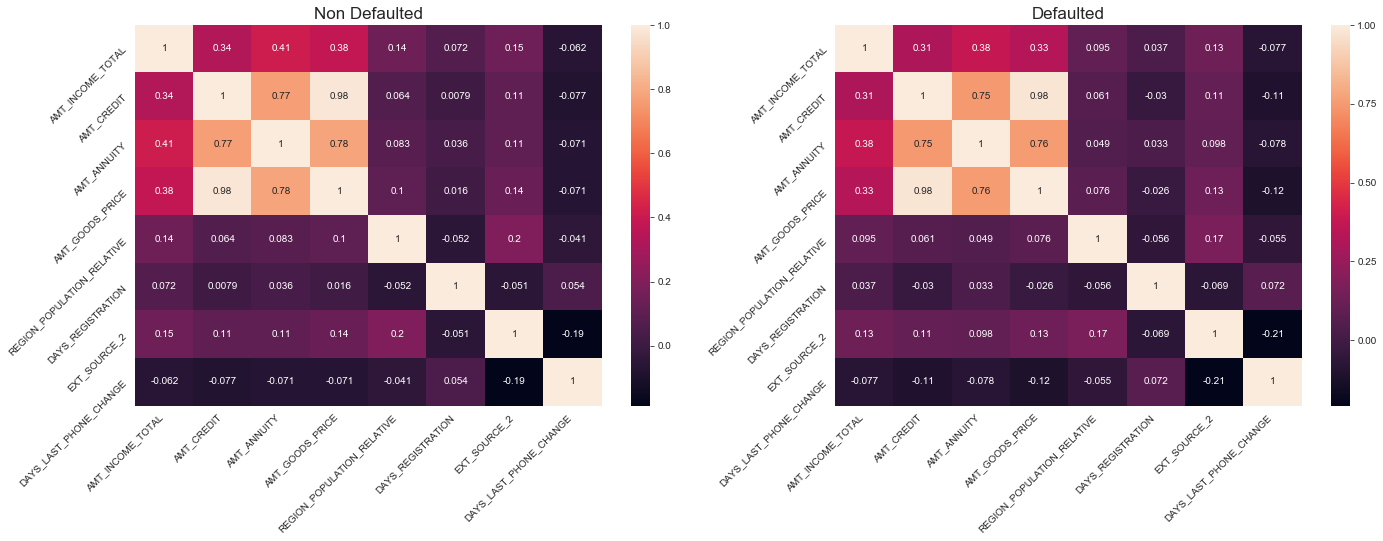

In [62]:
plt.figure(figsize=(23, 7))

plt.subplot(121)
sns.heatmap(data=num_corr0, annot=True)
plt.yticks(rotation=45, horizontalalignment='right')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Non Defaulted', fontsize=17)

plt.subplot(122)
sns.heatmap(data=num_corr1, annot=True)
plt.yticks(rotation=45, horizontalalignment='right')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Defaulted', fontsize=17)

plt.show() 

**We can clearly see that highest correleation is identical between Non Defaulters and Defaulters for all the numerical columns in both the datasets.**

**We will now locate the top most correlated fields in the datasets.**

In [63]:
top_corr_1=(num_corr1
            .corr()
            .abs()
            .unstack()
            .sort_values(ascending=False)
            .drop_duplicates()
            .head(11)
            .tail(10).reset_index())
                    
top_corr_0=(num_corr0
            .corr()
            .abs()
            .unstack()
            .sort_values(ascending=False)
            .drop_duplicates()
            .head(11)
            .tail(10).reset_index())

print ("Top correlation in Non Defaults")
print(top_corr_0)
print ()
print ("Top correlation in Defaults")
print(top_corr_1) 

Top correlation in Non Defaults
                  level_0                 level_1         0
0              AMT_CREDIT         AMT_GOODS_PRICE  0.999104
1             AMT_ANNUITY         AMT_GOODS_PRICE  0.948302
2              AMT_CREDIT             AMT_ANNUITY  0.943715
3            EXT_SOURCE_2  DAYS_LAST_PHONE_CHANGE  0.549509
4        AMT_INCOME_TOTAL             AMT_ANNUITY  0.499746
5  DAYS_LAST_PHONE_CHANGE             AMT_ANNUITY  0.469560
6  DAYS_LAST_PHONE_CHANGE         AMT_GOODS_PRICE  0.466954
7        AMT_INCOME_TOTAL  DAYS_LAST_PHONE_CHANGE  0.461187
8              AMT_CREDIT  DAYS_LAST_PHONE_CHANGE  0.446719
9        AMT_INCOME_TOTAL         AMT_GOODS_PRICE  0.438687

Top correlation in Defaults
                  level_0                 level_1         0
0              AMT_CREDIT         AMT_GOODS_PRICE  0.999274
1             AMT_ANNUITY         AMT_GOODS_PRICE  0.937002
2              AMT_CREDIT             AMT_ANNUITY  0.935221
3            EXT_SOURCE_2  DAYS_LAST_PH

**We can see our previous findings to be accurate in regards to correlation analysis.**

## Univariate analysis for the numerical variables in Application Dataset

**We will now analyse the** <span style="color:#ff8226">**numerical variables**</span> **to find if there's any correlation between the variables and the probability of someone being a defaulter.**

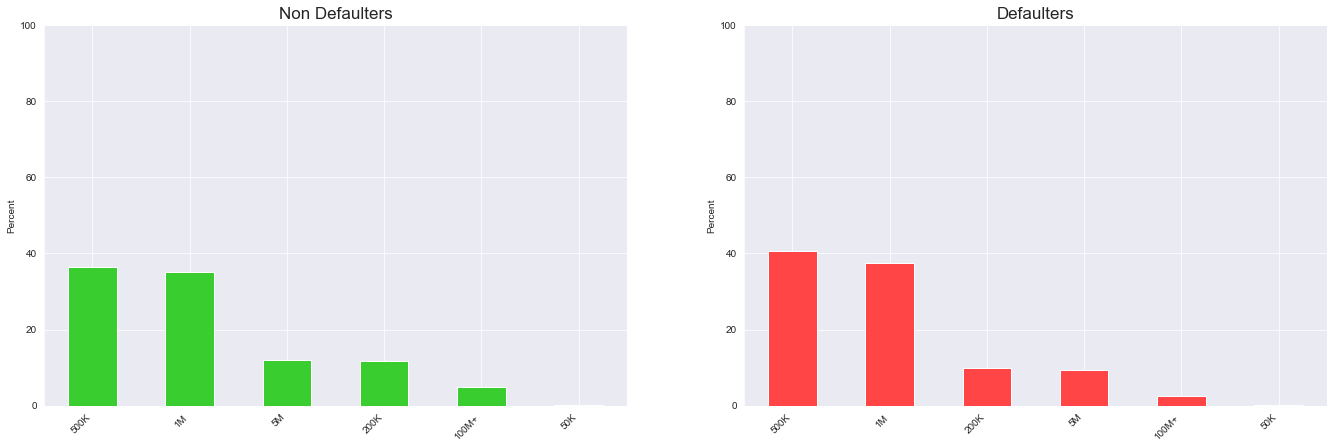

In [64]:
plt.figure(figsize=(23,7))
plt.subplot(121)
plt.ylim(0, 100)
ax = (app_df0.AMT_CREDIT_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#3acd2f')
ax.set(ylabel="Percent")
plt.title('Non Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(122)
plt.ylim(0, 100)
ax = (app_df1.AMT_CREDIT_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#ff4545')
ax.set(ylabel="Percent")
plt.title('Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show() 

**We see from this plot that a higher percentage of Defaulters are in the middle range, i.e. 500K to 1M. However, it seems people are less likely to default if the tax credit amount is very high or relatively low, i.e. 5M or 200K.**

**Let's plot the income bins and see if there's any correlation.**

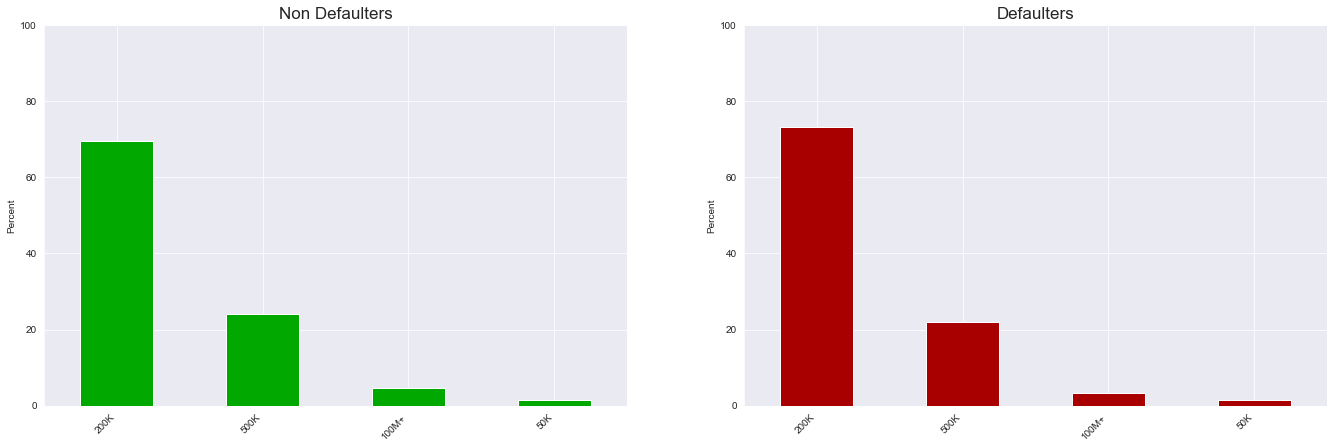

In [65]:
plt.figure(figsize=(23,7))
plt.subplot(121)
plt.ylim(0, 100)
ax = (app_df0.AMT_INCOME_TOTAL_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#00a800')
ax.set(ylabel="Percent")
plt.title('Non Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(122)
plt.ylim(0, 100)
ax = (app_df1.AMT_INCOME_TOTAL_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#a80000')
ax.set(ylabel="Percent")
plt.title('Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show() 

**We can see that the spread of the data is not really significant, and we can assume that the slight difference is inherent and therefore we can state that there's no real correlation between income and probability of defaulting.**

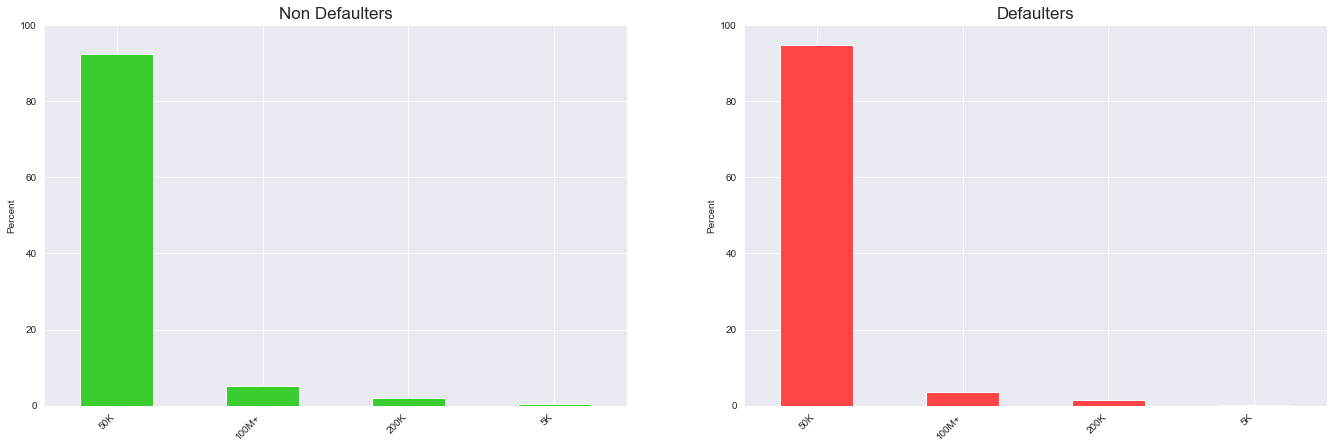

In [66]:
plt.figure(figsize=(23,7))
plt.subplot(121)
plt.ylim(0, 100)
ax = (app_df0.AMT_ANNUITY_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#3acd2f')
ax.set(ylabel="Percent")
plt.title('Non Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(122)
plt.ylim(0, 100)
ax = (app_df1.AMT_ANNUITY_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#ff4545')
ax.set(ylabel="Percent")
plt.title('Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show() 

**We again see that spread of the data is nearly identical for both Defaulters and Non Defaulters.**

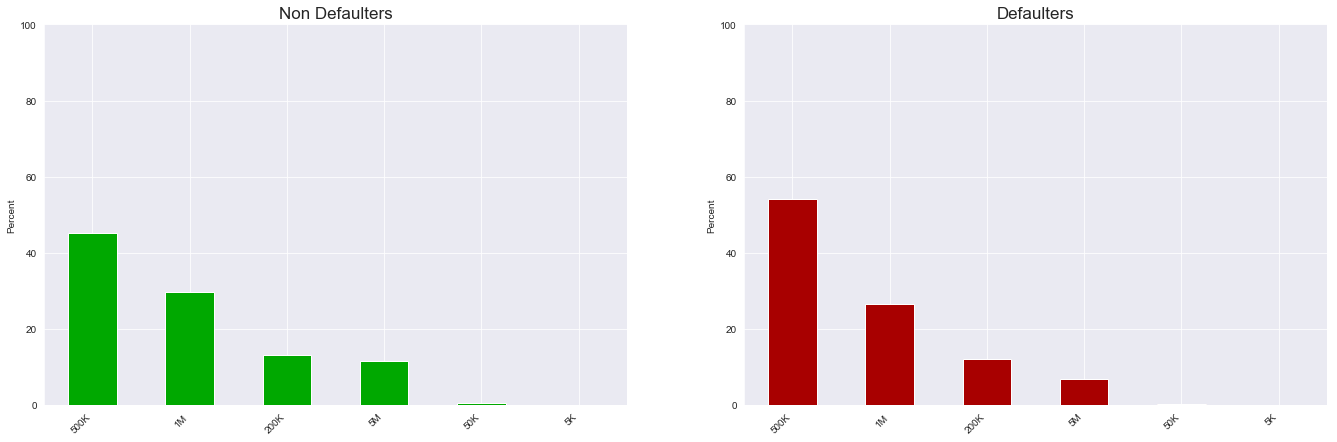

In [67]:
plt.figure(figsize=(23,7))
plt.subplot(121)
plt.ylim(0, 100)
ax = (app_df0.AMT_GOODS_PRICE_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#00a800')
ax.set(ylabel="Percent")
plt.title('Non Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(122)
plt.ylim(0, 100)
ax = (app_df1.AMT_GOODS_PRICE_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#a80000')
ax.set(ylabel="Percent")
plt.title('Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show() 

**We see a much larger correlation here compared to other variables. The loans for which the goods price fall in the 500K bin, have a significantly higher probability of being defaulted, and higher value loans i.e. 1M or 5M have a significantly lower probability of being defaulted.**

**Let's take a look at the last numerical variable we are analysing for Application Data, 'DAYS_LAST_PHONE_CHANGE'.**

In [68]:
app_df_drop['DAYS_LAST_PHONE_CHANGE'].describe() 

count    307511.000000
mean       -962.855657
std         826.808966
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

**We will define another function to bin this variable. This will make it easier to analyse and interpret the results.**

In [69]:
def bin_days(amt):
    days_bins = {'12-10 Years' : (-4380, -3650), '10-8 Years': (-3649, -2920), '8-6 Years' : (-2919, -2190), '6-4 Years' : (-2189, -1460), \
           '4-2 Years'  : (-1459, -730), '2-1 Years' : (-729, -365), '1 Year to 6 Months' : (-364, -180), \
           '6-3 Months' : (-179, -90), '3-1 Months' : (-89, -30), 'Less than 1 Month' : (-29, 0)}
    for (bin_cat, bin_range) in days_bins.items():
        if bin_range[1] == None:
            return bin_cat
        elif amt >= bin_range[0] and amt <= bin_range[1]:
            return bin_cat
    return 'NO Bin'
        

In [70]:
app_df1['DAYS_LAST_PHONE_CHANGE_BIN'] = app_df1. DAYS_LAST_PHONE_CHANGE.apply(bin_days)
app_df0['DAYS_LAST_PHONE_CHANGE_BIN'] = app_df0. DAYS_LAST_PHONE_CHANGE.apply(bin_days)

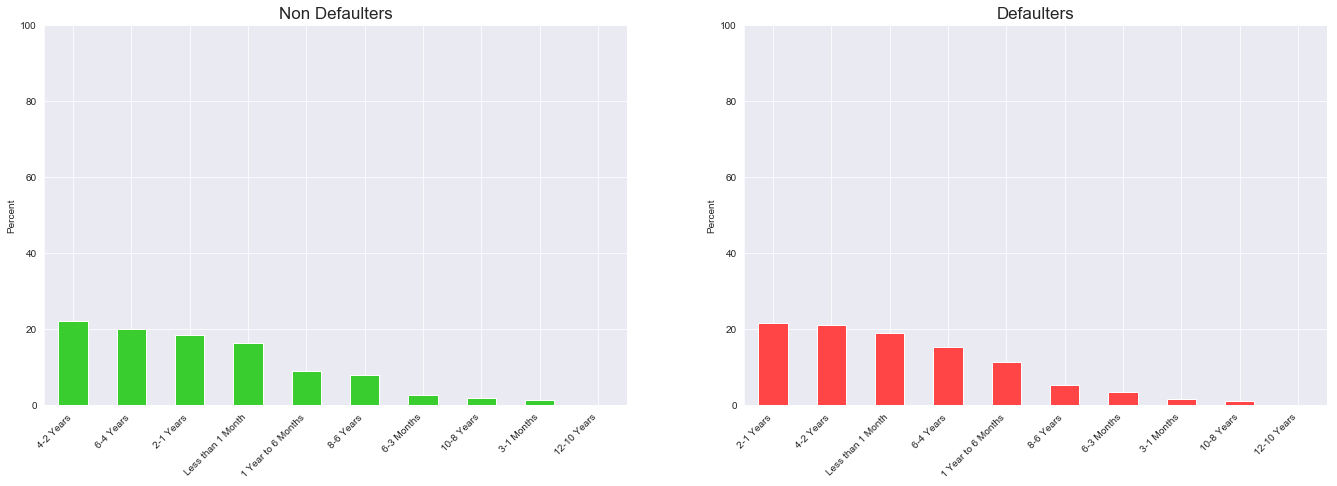

In [71]:
plt.figure(figsize=(23,7))
plt.subplot(121)
plt.ylim(0, 100)
ax = (app_df0.DAYS_LAST_PHONE_CHANGE_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#3acd2f')
ax.set(ylabel="Percent")
plt.title('Non Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(122)
plt.ylim(0, 100)
ax = (app_df1.DAYS_LAST_PHONE_CHANGE_BIN.value_counts(normalize=True, sort=True)*100).plot.bar(color='#ff4545')
ax.set(ylabel="Percent")
plt.title('Defaulters', fontsize=17)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show() 

**We see that the people who have changed their number in the last 2 to 1 Year or 1 Year to 6 Months period have a much higher probability of defaulting compared to thos who didn't.**

## Bivariate analysis for the numerical variables in Application Dataset

**We will plot a pair plot for the numerical columns in both the datasets. We will begin with the Non Defaulters.**

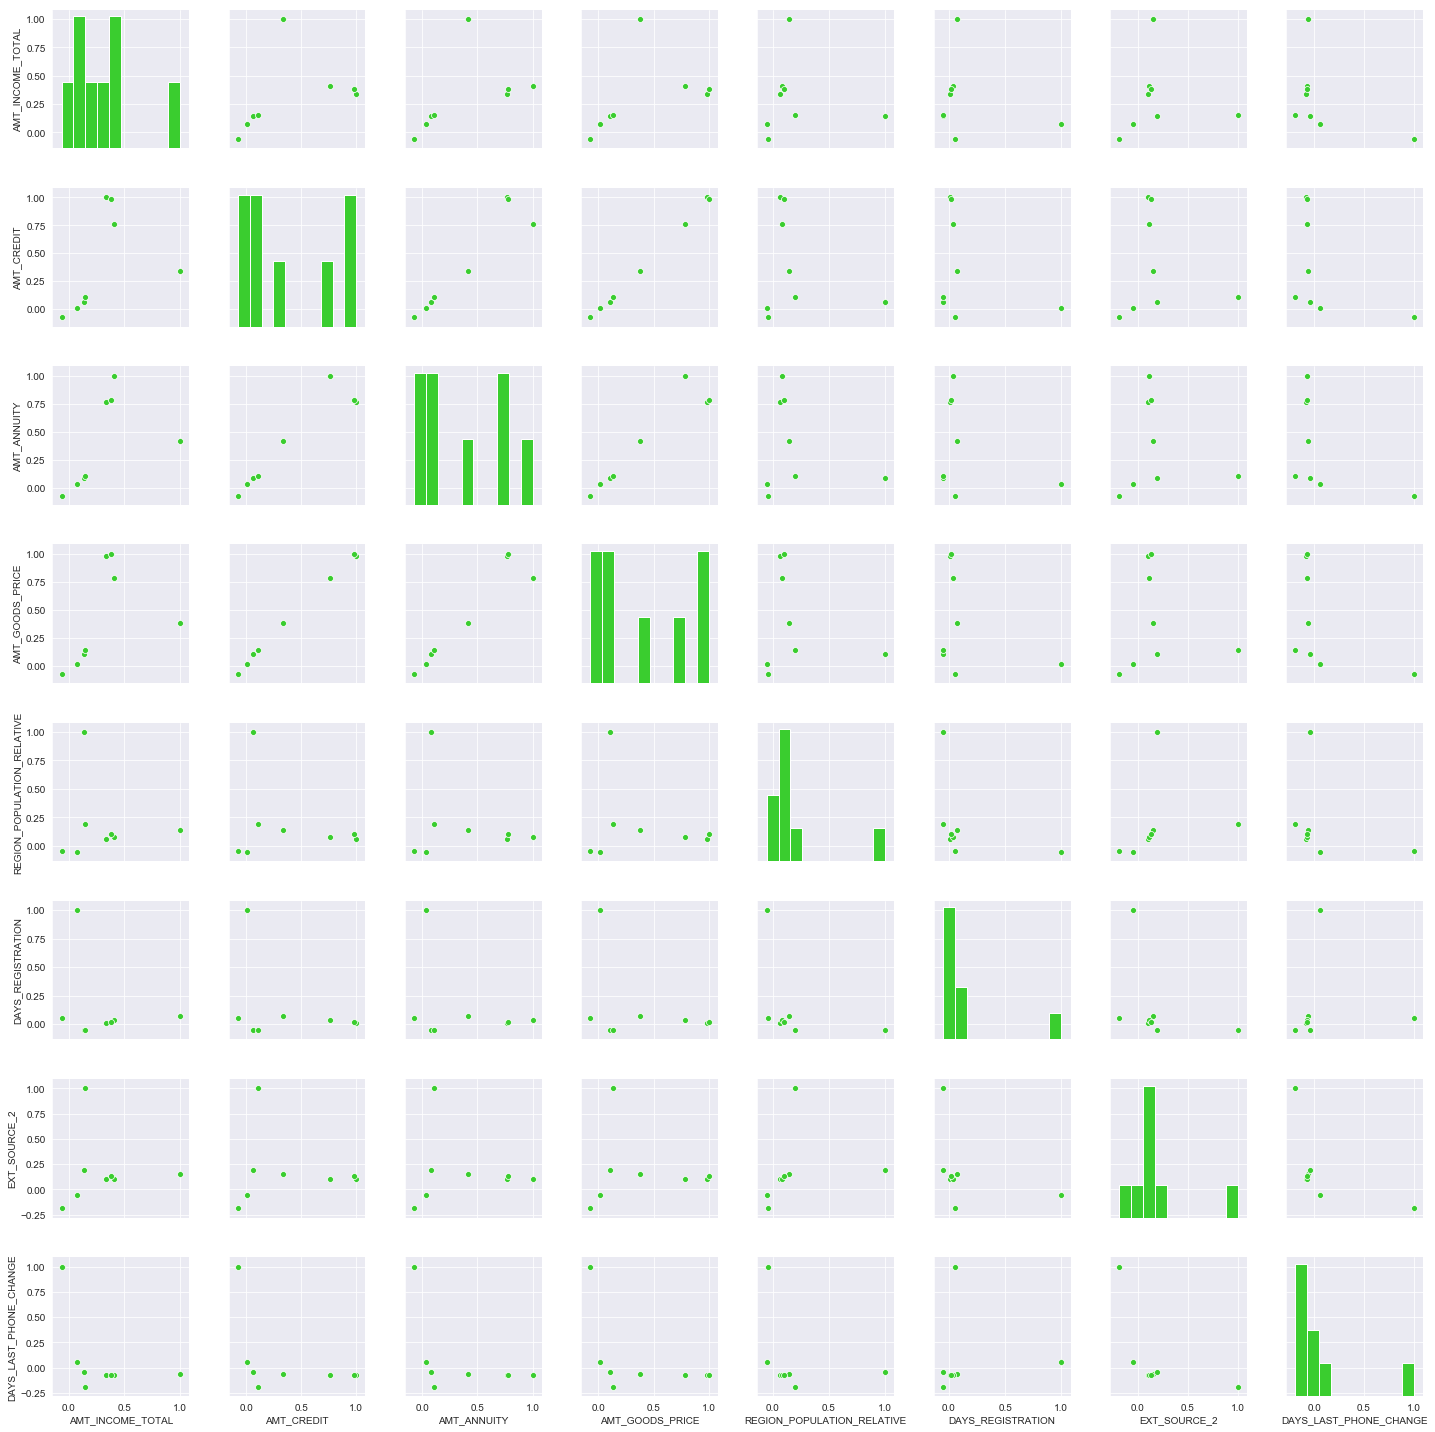

In [72]:
sns.pairplot(num_corr0, plot_kws=dict(color="#3acd2f"), diag_kws=dict(color="#3acd2f")) 
plt.show() 

**We can observe from this pair plot that AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE show a nearly perfect linear correlation amongst themselves.**

**Let's plot a pair plot for defaulters as well and see if there's any visible correlation.**

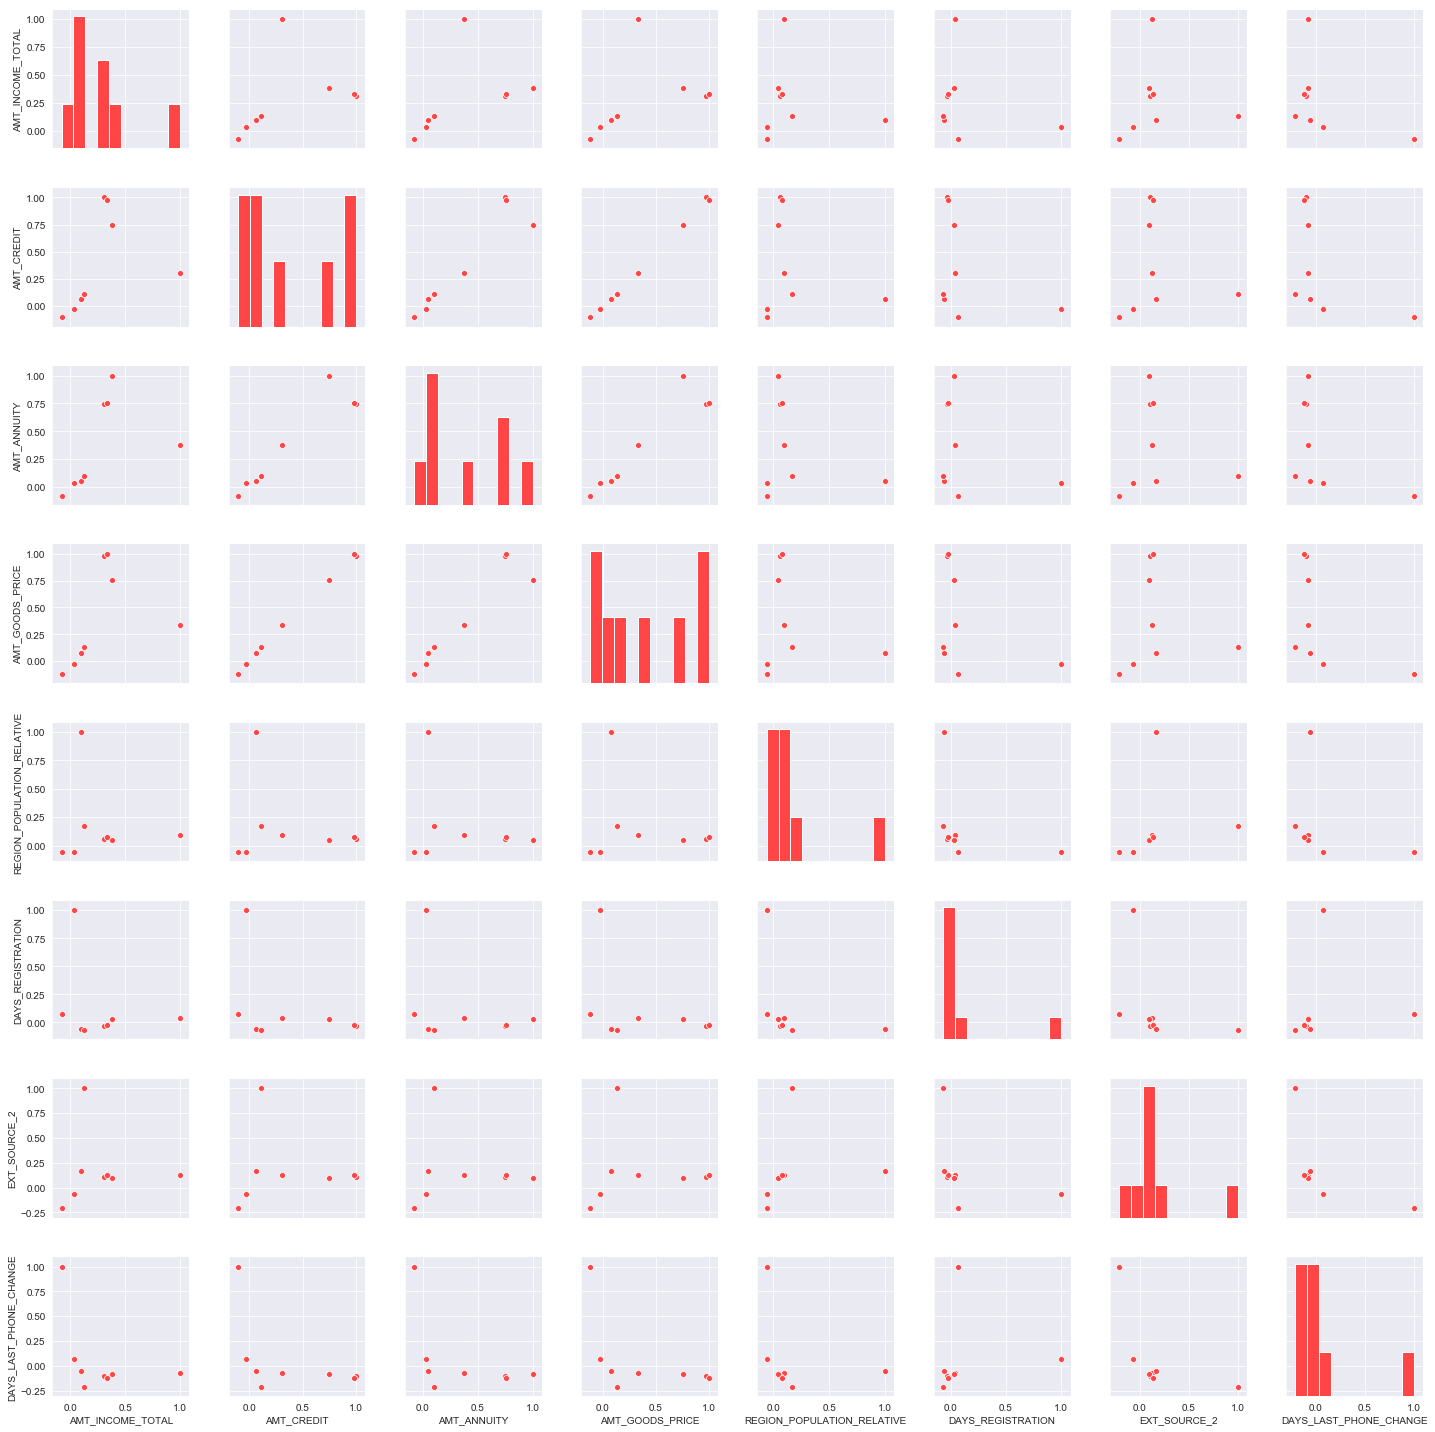

In [73]:
sns.pairplot(num_corr1, plot_kws=dict(color="#ff4545"), diag_kws=dict(color="#ff4545")) 
plt.show() 

**We can observe from this pair plot that the same three variables AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE show a nearly perfect linear correlation amongst themselves. Interesting to note that AMT_INCOME_TOTAL has an initially linear correlation with these 3 variables, and this correlation is certainly higher than the other dataset.**

## Data preparation for Previous Application Dataset

**We will read the Previous Application Data into a dataframe and perform the routine checks.**

In [4]:
prev_df = pd.read_csv('previous_application.csv')
#desc_prev = prev_df.describe()
prev_df.head() 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
prev_df.shape

(1670214, 37)

In [6]:
prev_df.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

**We will now check the percentage of missing values in the columns of this dataset.**

In [7]:
round(100*(prev_df.isnull().sum()/len(prev_df.index)), 2) 

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

**We will drop the columns which have more than 23.1% missing values, using our previous function.**

In [10]:
prev_df_trim = prev_df.drop(columns = get_top_nulls(prev_df, .231))
round(100*(prev_df_trim.isnull().sum()/len(prev_df_trim.index)), 2) 

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

**Considering we have a very large number of rows in this data, we will drop the rows with missing values. We will begin with 'AMT_GOODS_PRICE'.**

In [11]:
prev_df_trim = prev_df_trim[prev_df_trim['AMT_GOODS_PRICE'].notnull()] 
round(100*(prev_df_trim.isnull().sum()/len(prev_df_trim.index)), 2) 

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                    2.99
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                    2.99
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.00
dtype: float64

**We see that two columns still have a small percentage of missing values, and the percentages are identical. We believe that dropping the rows wil NaN in one column will get rid of NaNs in both the columns. Let's test this theory.**

In [12]:
prev_df_trim = prev_df_trim[prev_df_trim['AMT_ANNUITY'].notnull()] 
round(100*(prev_df_trim.isnull().sum()/len(prev_df_trim.index)), 2) 

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

**We now have a clean dataset. Let's quickly examine the data types.**

In [13]:
prev_df_trim.dtypes 

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

## Univariate analysis for the categorical variables in Previous Application Dataset

**We will bin the WEEKDAY_APPR_PROCESS_START and plot it with the hue as NAME_CONTRACT_STATUS.**

In [14]:
def day_bin(day):
    day = abs(day)
    slots = {0:'CAT0', 1:'CAT1', 2:'CAT2', 3:'CAT3', 4:'CAT4', 5:'CAT5', 6:'CAT6'}
    return slots[int(day / 500)] 

In [16]:
prev_df_trim['DAYS_DECISION_BIN'] = prev_df_trim.DAYS_DECISION.apply(day_bin)
print (prev_df_trim.DAYS_DECISION_BIN.value_counts()) 

CAT0    415947
CAT1    336001
CAT2    171936
CAT3    120803
CAT4    112749
CAT5     88884
Name: DAYS_DECISION_BIN, dtype: int64


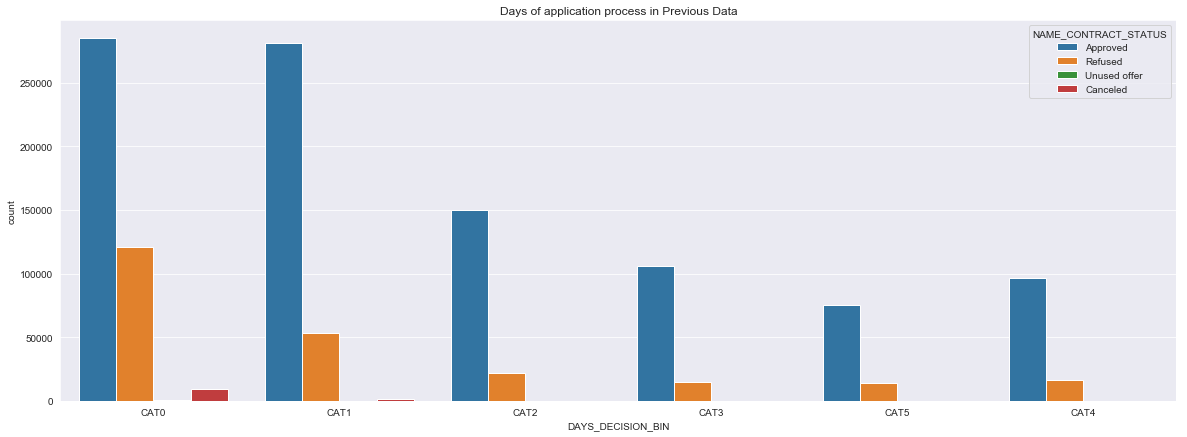

In [26]:
plt.figure(figsize=(20, 7))
sns.countplot(x="DAYS_DECISION_BIN", hue='NAME_CONTRACT_STATUS', data=prev_df_trim) 
plt.title("Days of application process in Previous Data", fontsize=17) 
plt.show() 

**We can clearly see CAT1 has a much higher chance of getting approved.**

**We will now plot the day of the week and see if we can find any correlation.**

Text(0.5, 1.0, 'Days distribution in Previous Data')

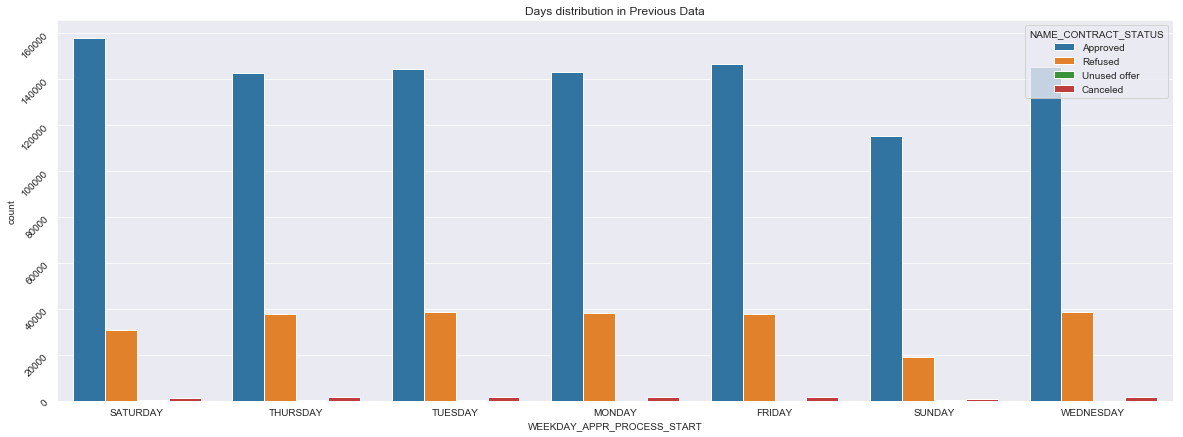

In [19]:
plt.figure(figsize=(20, 7))
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', hue='NAME_CONTRACT_STATUS', data=prev_df_trim)
plt.yticks(rotation=45, horizontalalignment='right')
plt.title("Days distribution in Previous Data", fontsize=17) 
plt.show() 

**From this we can infer that while number of applications are lower on Sundays, they have a higher chance of getting approved.**

**Let's see what is distribution of approval status against client type.**

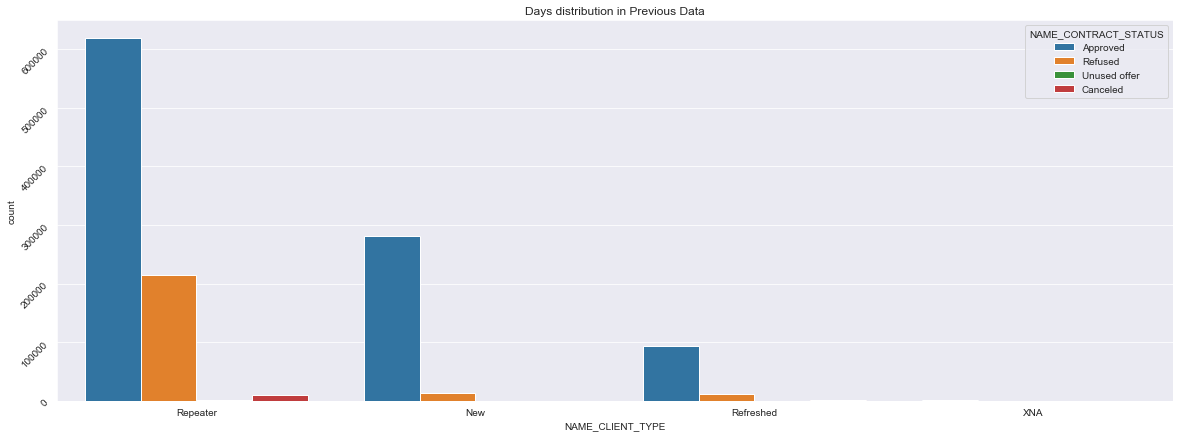

In [25]:
plt.figure(figsize=(20, 7))
sns.countplot(x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', data=prev_df_trim)
plt.yticks(rotation=45, horizontalalignment='right')
plt.title("Days distribution in Previous Data", fontsize=17) 
plt.show() 

**We can clearly see that a much smaller percentage of fresh applicants are rejected, compared to the repeat applicants.**

**We will now prepare the data to find the most common reason people apply for a loan.**

In [23]:
prev_df_trim.loc[prev_df_trim.NAME_CASH_LOAN_PURPOSE.isin(['XAP', 'XNA']), 'NAME_CASH_LOAN_PURPOSE'] = None

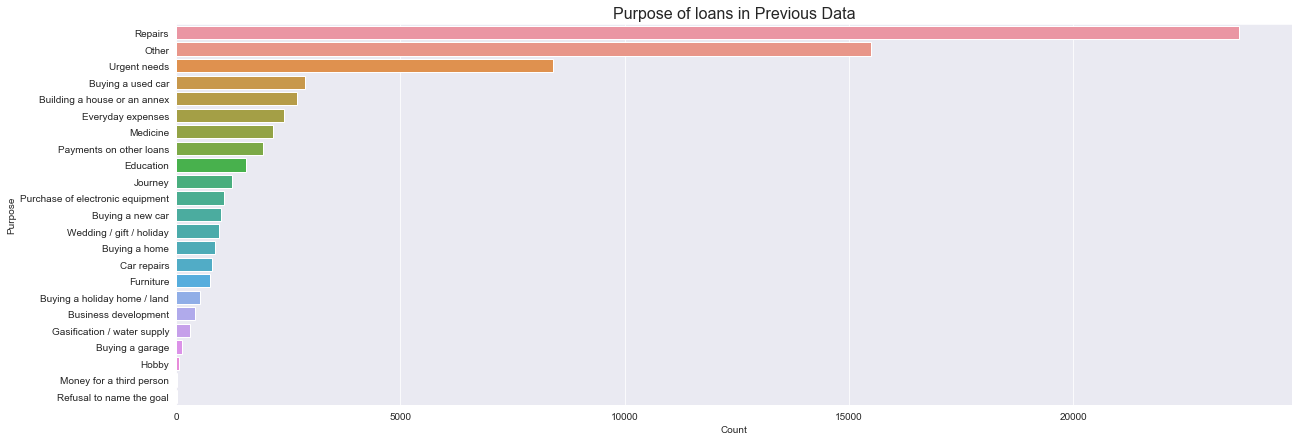

In [24]:
plt.figure(figsize=(20, 7))
grp_df=prev_df_trim.NAME_CASH_LOAN_PURPOSE.value_counts().reset_index()
grp_df.columns = ['Purpose', 'Count']
sns.barplot(x='Count', y='Purpose', data=grp_df)
plt.title("Purpose of loans in Previous Data", fontsize=16)
plt.show() 

**We see that the top 5 reasons people apply for a loan are Repairs, Other, Urgent needs, Buying a used car, and Building a house or an annex.**

## Univariate analysis for the numerical variables in Previous Application Dataset

**We will now bin 4 cointinuous variables for further analysis using our previously defined function.**

In [30]:
prev_df_trim['AMT_ANNUITY_BIN'] = prev_df_trim.AMT_ANNUITY.apply(bin_amounts) 
prev_df_trim['AMT_APPLICATION'] = prev_df_trim.AMT_APPLICATION.apply(bin_amounts) 
prev_df_trim['AMT_CREDIT_BIN'] = prev_df_trim.AMT_CREDIT.apply(bin_amounts) 
prev_df_trim['AMT_GOODS_PRICE_BIN'] = prev_df_trim.AMT_GOODS_PRICE.apply(bin_amounts) 

**Let's plot the first one against contract status and see what we find.**

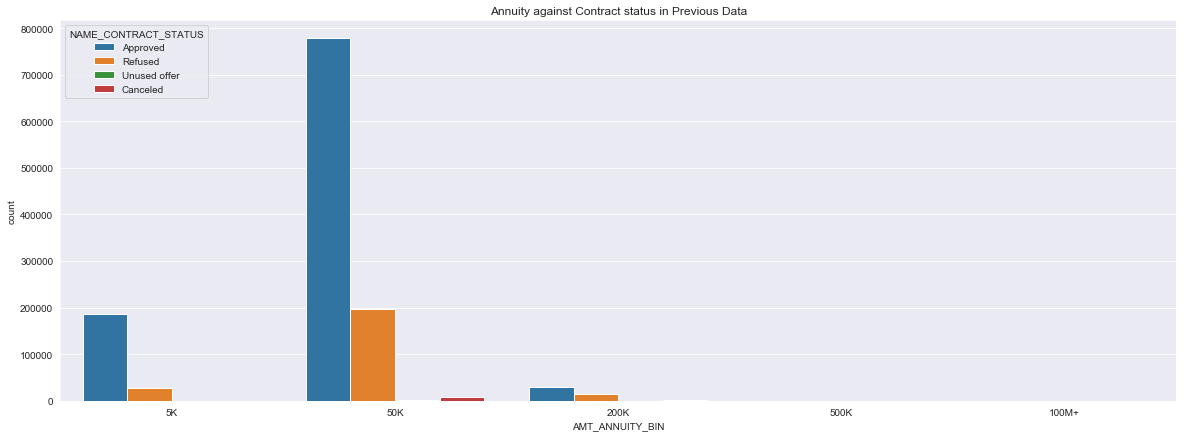

In [31]:
plt.figure(figsize=(20, 7))
sns.countplot(x="AMT_ANNUITY_BIN", hue='NAME_CONTRACT_STATUS', data=prev_df_trim) 
plt.title("Annuity against Contract status in Previous Data", fontsize=17) 
plt.show() 

**We can see that people with lower annuity have a higher chance of getting their loan approved. Let's plot the next one.**

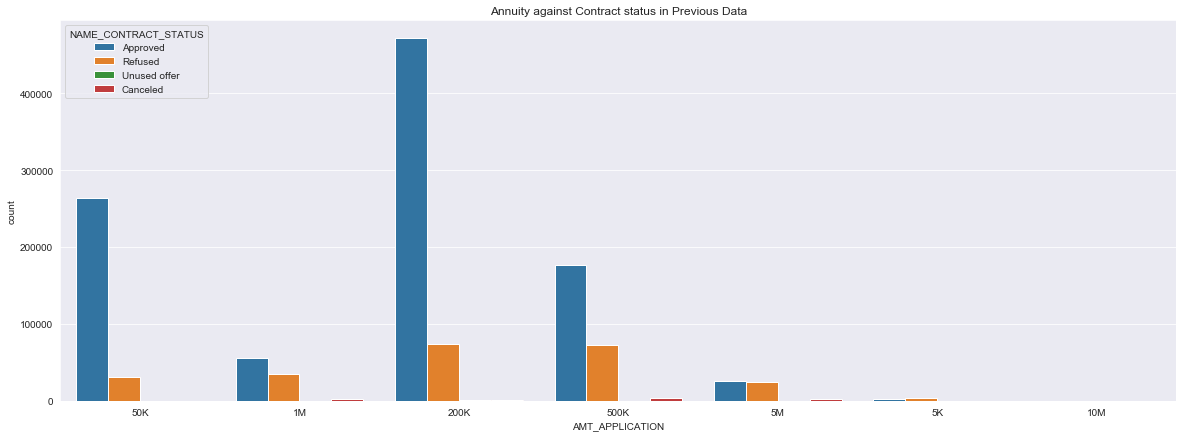

In [32]:
plt.figure(figsize=(20, 7))
sns.countplot(x="AMT_APPLICATION", hue='NAME_CONTRACT_STATUS', data=prev_df_trim) 
plt.title("Application against Contract status in Previous Data", fontsize=17) 
plt.show() 

**We can see that loan amounts falling in the 50K and 200K brackets has a high probability of getting approved. 5M and 5K has basically a nearly 50-50 chance of getting either approved or rejected. Let's plot our next variable.**

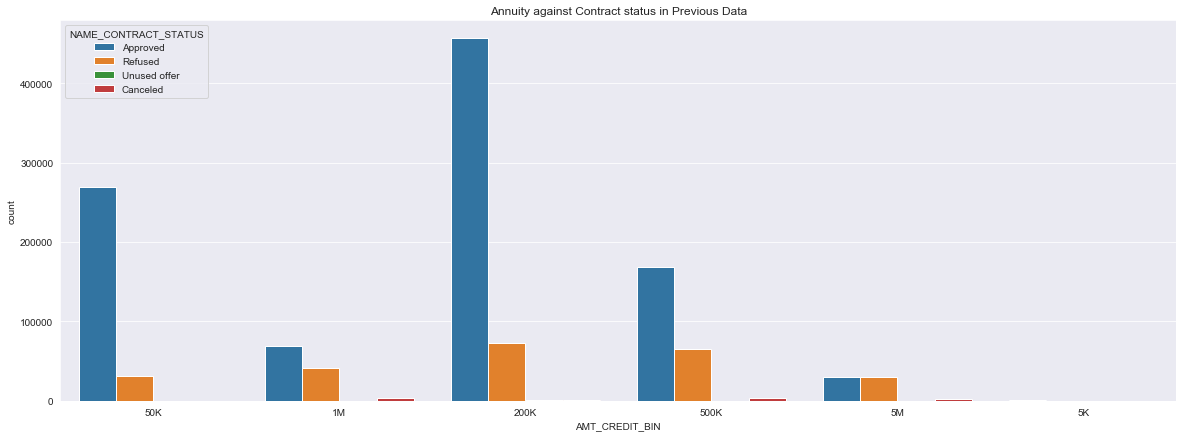

In [33]:
plt.figure(figsize=(20, 7))
sns.countplot(x="AMT_CREDIT_BIN", hue='NAME_CONTRACT_STATUS', data=prev_df_trim) 
plt.title("Credit against Contract status in Previous Data", fontsize=17) 
plt.show() 

**We see that people with Tax credit in the brackets of 50K and 200K have a higher chance of getting their loans approved, compared to people in 500K and 1M. Let's plot the last one.**

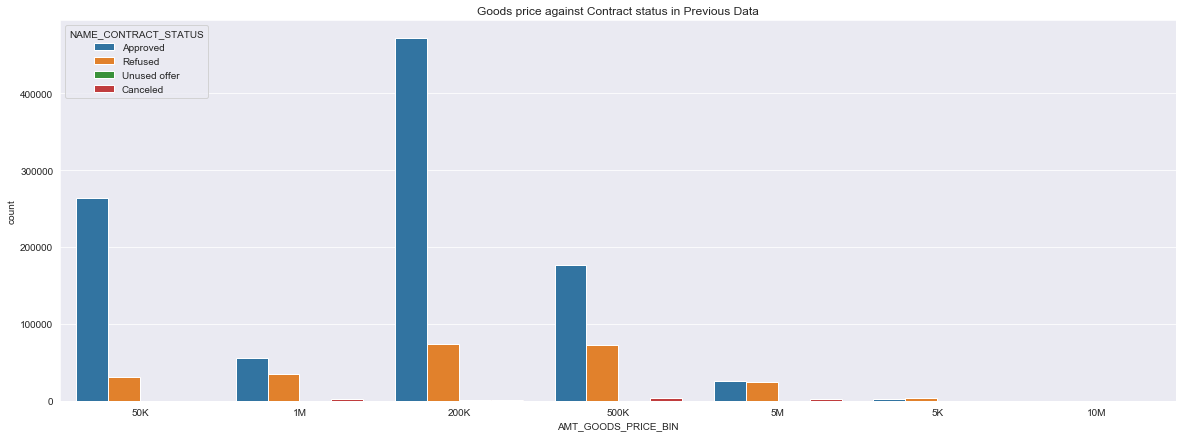

In [34]:
plt.figure(figsize=(20, 7))
sns.countplot(x="AMT_GOODS_PRICE_BIN", hue='NAME_CONTRACT_STATUS', data=prev_df_trim) 
plt.title("Goods price against Contract status in Previous Data", fontsize=17) 
plt.show() 

**We see the same story repeated once again, 50K and 200K brackets are most likely to get approved, compared to 1M and 5M goods prices.**

## Bivariate analysis for the numerical variables in Previous Application Dataset

**Let's plot a heatmap for the continuous variables in the previous application data and see what we can glean from it.**

In [35]:
num_variables = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE', 'CNT_PAYMENT']
prev_df_num = prev_df[num_variables]
prev_num_corr = prev_df_num.corr() 

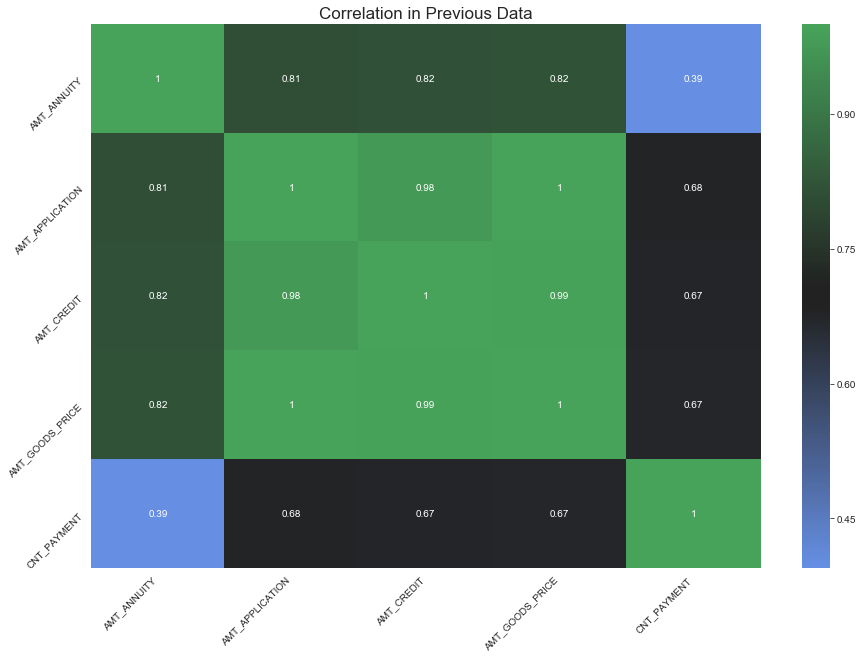

In [37]:
plt.figure(figsize=(15, 10))

cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark", as_cmap=True)
sns.heatmap(data=prev_num_corr, annot=True, cmap=cmap)
plt.yticks(rotation=45, horizontalalignment='right')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Correlation in Previous Data', fontsize=17)

plt.show()

**We can see that the same variables are correlated though one of them shows an inverse correlation against annuity, and almost no correlation against the other ones.**

In [38]:
top_corr_prev=(prev_df_trim
                    .corr()
                    .abs()
                    .unstack()
                    .sort_values(ascending=False)
                    .drop_duplicates()
                    .head(11)
                    .tail(10).reset_index())

print ("Top correlations in Previous data")
print(top_corr_prev) 

Top correlations in Previous data
           level_0          level_1         0
0       AMT_CREDIT  AMT_GOODS_PRICE  0.993028
1      AMT_ANNUITY  AMT_GOODS_PRICE  0.820895
2      AMT_ANNUITY       AMT_CREDIT  0.814884
3      CNT_PAYMENT       AMT_CREDIT  0.700323
4      CNT_PAYMENT  AMT_GOODS_PRICE  0.672129
5      AMT_ANNUITY      CNT_PAYMENT  0.401020
6       AMT_CREDIT    DAYS_DECISION  0.303135
7  AMT_GOODS_PRICE    DAYS_DECISION  0.294529
8      AMT_ANNUITY    DAYS_DECISION  0.267939
9    DAYS_DECISION      CNT_PAYMENT  0.231070


**We can clearly see the most correlated variables from this list are the ones we find on the heatmap.**

## Final Words

**We can infer from our analysis so far that monetary variables are highly correlated, and they influence defaulting and loan approval or rejection to a large degree. Apart from that we found that some of the prejudices are correct, e.g. married people are less likely to dafault compared to Single/Unmarried people. We also found some hidden patterns in the data, e.g. loans that are applied for on Sundays have a higher chance of getting approved.**  
**With a rich dataset like, more fine grained analysis can be done and more interesting patterns can be found, which, sadly, are out of the scope of this project.**  
**Lastly, we had perfectly complimentary team which made this experience really enjoyable, one of us being a prolific coder, and the other being a passionate statistician.**